In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# Fit the scaler to the data and create the scaled data
scaled_data = scaler.fit_transform(market_data_df)


In [5]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
scaled_market_data_df["coin_id"] = market_data_df.index

# Set the coinid column as index
scaled_market_data_df.set_index("coin_id", inplace=True)

# Display sample data
scaled_market_data_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(scaled_market_data_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()

c:\Users\peyto\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\peyto\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\peyto\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\peyto\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051


<Axes: xlabel='k'>

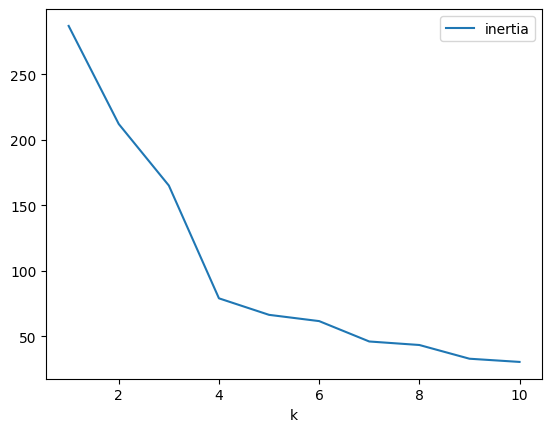

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x="k", y="inertia")


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)



In [9]:
# Fit the K-Means model using the scaled data
model.fit(scaled_market_data_df)


c:\Users\peyto\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_data_predictions = model.predict(scaled_market_data_df)

# View the resulting array of cluster values.
market_data_predictions


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [11]:
# Create a copy of the DataFrame
market_data_predictions_df = scaled_market_data_df.copy()


In [12]:
# Add a new column to the DataFrame with the predicted clusters
market_data_predictions_df["cluster"] = market_data_predictions

# Display sample data
market_data_predictions_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

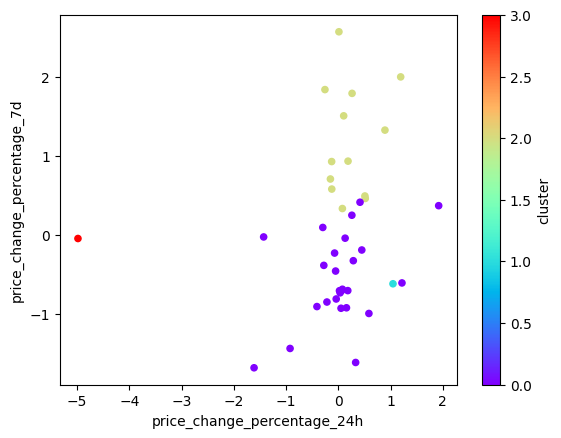

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_predictions_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",
    cmap="rainbow",
    colorbar=True,
)


### Optimize Clusters with Principal Component Analysis.

In [ ]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_market_data = pca.fit_transform(scaled_market_data_df)

# View the first five rows of the DataFrame. 
pca_market_data_df = pd.DataFrame(pca_market_data, columns=["PC 1", "PC 2", "PC 3"])
pca_market_data_df.head()


,PC 1,PC 2,PC 3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The three components capture 89.5% of the total variance.

In [17]:
# Create a new DataFrame with the PCA data.

pca_market_data_df = pd.DataFrame(
    data=pca_market_data, # Creating a DataFrame with the PCA data
    columns=["PCA1", "PCA2", "PCA3"], # Copy the crypto names from the original data
    index=market_data_df.index  # Set the coinid column as index
)

# Display sample data
pca_market_data_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(pca_market_data_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df


c:\Users\peyto\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\peyto\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\peyto\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\peyto\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: xlabel='k'>

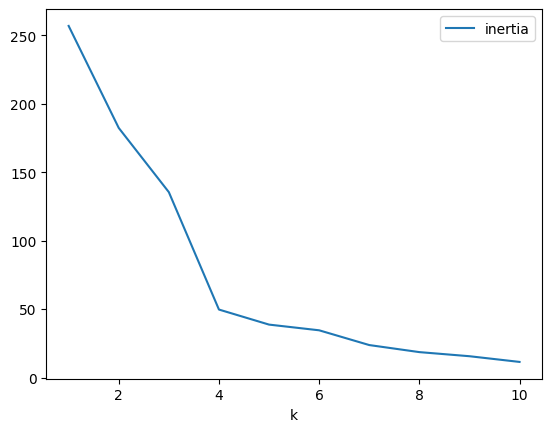

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x="k", y="inertia")


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No but it's more clear

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)



In [21]:
# Fit the K-Means model using the PCA data
model.fit(pca_market_data_df)



c:\Users\peyto\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [22]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_market_data_df["pca_clusters"] = model.predict(pca_market_data_df)

# Print the resulting array of cluster values.
pca_market_data_df["pca_clusters"]


coin_id
bitcoin                 2
ethereum                2
tether                  0
ripple                  0
bitcoin-cash            2
binancecoin             2
chainlink               2
cardano                 2
litecoin                2
bitcoin-cash-sv         0
crypto-com-chain        0
usd-coin                0
eos                     0
monero                  2
tron                    0
tezos                   2
okb                     0
stellar                 0
cosmos                  2
cdai                    0
neo                     0
wrapped-bitcoin         2
leo-token               0
huobi-token             0
nem                     0
binance-usd             0
iota                    0
vechain                 0
zcash                   2
theta-token             0
dash                    0
ethereum-classic        0
ethlend                 3
maker                   2
havven                  0
omisego                 0
celsius-degree-token    1
ontology                0
ftx-

In [23]:
# Make a copy of the DataFrame
pca_market_data_df = pca_market_data_df.copy()

# Predict clusters using only the PCA components (exclude any existing cluster columns)
clusters = model.predict(pca_market_data_df[["PCA1", "PCA2", "PCA3"]])

# Add the predicted clusters to the DataFrame
pca_market_data_df["pca_clusters"] = clusters

# Display sample data
pca_market_data_df.head()

,PCA1,PCA2,PCA3,pca_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

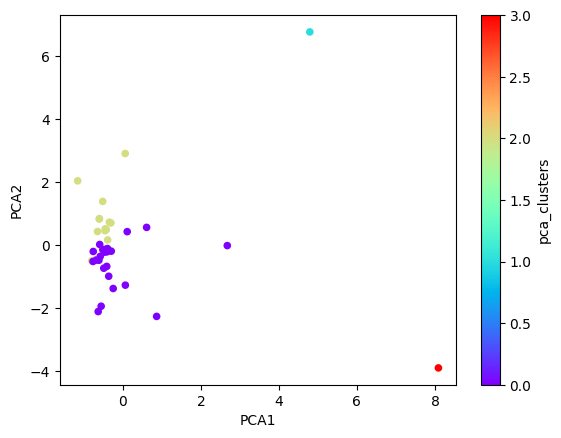

In [24]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. Add a color for each cluster. Make the colors rainbow.
pca_market_data_df.plot.scatter(x="PCA1", y="PCA2", c="pca_clusters", cmap="rainbow")


### Determine the Weights of Each Feature on each Principal Component

In [25]:
# Use the columns from the original scaled DataFrame as the index.
pca_market_data_df.index = scaled_market_data_df.index

In [26]:
features = scaled_market_data_df.columns
pcs = [f"PC{i+1}" for i in range(pca.n_components_)]

# build a loadings table
loadings = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=pcs
)

# show the absolute‐value sorted weights for each PC
for pc in pcs:
    print(f"\nTop positive loadings for {pc}:")
    print(loadings[pc].sort_values(ascending=False).head(3))
    print(f"Top negative loadings for {pc}:")
    print(loadings[pc].sort_values().head(3))


Top positive loadings for PC1:
price_change_percentage_200d    0.594468
price_change_percentage_1y      0.568379
price_change_percentage_60d     0.320365
Name: PC1, dtype: float64
Top negative loadings for PC1:
price_change_percentage_24h   -0.416728
price_change_percentage_7d    -0.102432
price_change_percentage_14d   -0.009162
Name: PC1, dtype: float64

Top positive loadings for PC2:
price_change_percentage_30d    0.562182
price_change_percentage_14d    0.540415
price_change_percentage_60d    0.434040
Name: PC2, dtype: float64
Top negative loadings for PC2:
price_change_percentage_1y     -0.150789
price_change_percentage_200d    0.027735
price_change_percentage_7d      0.227432
Name: PC2, dtype: float64

Top positive loadings for PC3:
price_change_percentage_7d     0.787670
price_change_percentage_14d    0.349534
price_change_percentage_1y     0.210541
Name: PC3, dtype: float64
Top negative loadings for PC3:
price_change_percentage_60d   -0.361377
price_change_percentage_24h   -0.21

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    Based on the PCA component loadings:
    * **PC1:**
        * Strongest Positive Influence: `price_change_percentage_200d` (approx. 0.594) and `price_change_percentage_1y` (approx. 0.568). These suggest PC1 is heavily influenced by longer-term price changes (200-day and 1-year).
        * Strongest Negative Influence: `price_change_percentage_24h` (approx. -0.417). This suggests PC1 is negatively correlated with short-term (24-hour) price changes.
    * **PC2:**
        * Strongest Positive Influence: `price_change_percentage_30d` (approx. 0.562) and `price_change_percentage_14d` (approx. 0.540). These indicate PC2 captures medium-term volatility (14-day and 30-day).
        * Strongest Negative Influence: `price_change_percentage_1y` (approx. -0.151).
    * **PC3:**
        * Strongest Positive Influence: `price_change_percentage_7d` (approx. 0.788). This shows PC3 is strongly driven by 7-day price changes.
        * Strongest Negative Influence: `price_change_percentage_60d` (approx. -0.361).